<a href="https://colab.research.google.com/github/NaderJS/hacknotebooks/blob/master/machathon_filteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machathon Filteration
https://www.kaggle.com/c/machathon-10-filteration-test

In [0]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from catboost import Pool
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from keras.layers import BatchNormalization
from tensorflow import keras
from sklearn.preprocessing import StandardScaler



In [0]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.0.1-cp36-none-any.whl size=10032 sha256=4e622e581a579532007d025af1a44109bcdaafadb4ff61c40da39a9bcd0182ab
  Stored in directory: /root/.cache/pip/wheels/1d/0d/3b/6b9d4477a34b3905f246ff4e7acf6aafd4cc9b77d473629b77
Successfully built bayesian-optimization


In [0]:
!pip install catboost

     |████████████████████████████████| 64.0MB 47kB/s 


In [0]:
!pwd

/content


In [0]:
traindata = pd.read_csv("./train.csv")

In [0]:
traindata.head(40)

In [0]:
traindata.drop(["Unnamed: 0","WellID"],axis=1,inplace=True)

In [0]:
y = traindata["TotalOilInNext6Months"]
X = traindata.drop("TotalOilInNext6Months",axis=1)

In [0]:
traindata.describe()

,FirstMonthOil,FirstMonthGas,FirstMonthRatioGasOil,FirstMonthWater,firstMonthPercentWater,FirstMonthDaysOn,SecondMonthOil,SecondMonthGas,SecondMonthRatioGasOil,SecondMonthWater,...,FifthMonthPercentWater,FifthMonthDaysOn,SixthMonthOil,SixthMonthGas,SixthMonthRatioGasOil,SixthMonthWater,SixthMonthPercentWater,SixthMonthDaysOn,TotalOilInNext6Months,TotalGasInNext6Months
count,9324.000000,9324.000000,9324.000000,9.324000e+03,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9.324000e+03,...,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9.324000e+03
mean,10975.998391,23654.428142,36.483768,7.050517e+03,0.793089,19.624303,7361.601459,19751.486808,71.088354,3.985776e+03,...,0.739190,18.994316,4239.232947,12985.894466,21.405811,2551.490562,0.763946,19.130309,19742.820249,6.355971e+04
std,8091.976505,35067.286099,891.599302,1.800020e+04,5.943600,13.369777,5960.634208,30780.151750,1865.962676,1.440518e+04,...,3.002129,13.670981,3618.018873,19470.328468,601.380057,8158.773532,3.272239,13.737993,15678.751814,9.197275e+04
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,5140.500000,5928.000000,0.664069,0.000000e+00,0.000000,0.000000,3057.750000,4207.750000,0.671820,0.000000e+00,...,0.000000,0.000000,1628.000000,2930.500000,0.702584,0.000000,0.000000,0.000000,8073.250000,1.690325e+04
50%,9281.000000,13158.000000,1.151556,4.115000e+03,0.345983,28.000000,6039.000000,10200.000000,1.257137,2.158500e+03,...,0.250708,28.000000,3433.500000,6542.000000,1.412128,1077.000000,0.250451,28.000000,16437.000000,3.321850e+04
75%,15075.500000,26262.500000,2.745121,1.019175e+04,0.935886,30.000000,10172.250000,22444.250000,3.433525,5.748500e+03,...,0.775836,31.000000,5938.250000,15021.750000,4.593442,3674.250000,0.797680,31.000000,27737.500000,7.100925e+04
max,64499.000000,476177.000000,55789.500000,1.451478e+06,527.666667,31.000000,54790.000000,481633.000000,115698.000000,1.226836e+06,...,129.594937,31.000000,39832.000000,329776.000000,45804.250000,649898.000000,147.000000,31.000000,203364.000000,1.169180e+06


In [0]:
traindata.eq(0).sum()/len(traindata)

FirstMonthOil              0.003325
FirstMonthGas              0.036358
FirstMonthRatioGasOil      0.039575
FirstMonthWater            0.339768
firstMonthPercentWater     0.340519
FirstMonthDaysOn           0.302982
SecondMonthOil             0.030459
SecondMonthGas             0.036251
SecondMonthRatioGasOil     0.057701
SecondMonthWater           0.334728
SecondMonthPercentWater    0.336444
SecondMonthDaysOn          0.309095
ThirdMonthOil              0.030245
ThirdMonthGas              0.032604
ThirdMonthRatioGasOil      0.054376
ThirdMonthWater            0.325504
ThirdMonthPercentWater     0.326791
ThirdMonthDaysOn           0.308988
FourthMonthOil             0.035178
FourthMonthGas             0.033462
FourthMonthRatioGasOil     0.057164
FourthMonthWater           0.321214
FourthMonthPercentWater    0.323252
FourthMonthDaysOn          0.311776
FifthMonthOil              0.036894
FifthMonthGas              0.034535
FifthMonthRatioGasOil      0.059524
FifthMonthWater            0

In [0]:
xt,xp,yt,yp = train_test_split(X,y,shuffle=True)

In [0]:
rf= RandomForestRegressor(max_features=0.6,n_estimators=125,min_samples_leaf=7)
rf.fit(xt,yt)
vals = rf.predict(xp)
mean_absolute_error(yp,vals)

3094.696349553559

In [0]:
cat = CatBoostRegressor(random_state=56,learning_rate=0.03078496171814678,subsample = 0.7966067900567058,iterations=2500,max_depth=int(round(5.941162788606626)),l2_leaf_reg =0.39240391456470025,colsample_bylevel=0.6763514233486307,eval_metric="MAE",early_stopping_rounds=900)
val_set=Pool(xp,yp)
# cat.fit(xt,yt,eval_set=val_set,early_stopping_rounds=900,verbose=500)

In [0]:
losses=[]

for (i,val) in enumerate(xp.iterrows()):
  print(val[1])
  pred = cat.predict(val[1])
  losses.append((yp.iloc[i],mean_absolute_error(yp.iloc[i],pred)))

losses = Sort_Tuple(losses)
losses[:5]

  

In [0]:
cat.best_score_["validation"]["MAE"]

2891.3749463749464

In [0]:
def traincat(learning_rate,max_depth,l2_leaf_reg,colsample_bylevel,subsample):
    cat =  CatBoostRegressor(random_state=42,learning_rate=learning_rate,subsample = subsample,iterations=2500,max_depth=int(round(max_depth)),l2_leaf_reg =l2_leaf_reg,colsample_bylevel=colsample_bylevel,eval_metric="MAE",early_stopping_rounds=500)
    valset = Pool(xp,yp)
    cat.fit(xt,yt,eval_set=valset,verbose=500)
    return -cat.best_score_["validation"]["MAE"]

bounds = {
    'max_depth':(5,10),
#     'min_rows':(10,30),
    'l2_leaf_reg':(0.1,0.8),
    'learning_rate':(0.001, 0.06),
#     'sample_rate':(0.5,0.8),
     'colsample_bylevel': (0.3,1),
    'subsample' : (0.7,1)
}

optimizer = opt(
    f=traincat,
    pbounds=bounds,
    random_state=1,
)
optimizer.maximize(init_points=10, n_iter=55)

|   iter    |  target   | colsam... | l2_lea... | learni... | max_depth | subsample |
-------------------------------------------------------------------------------------
0:	learn: 11956.2420196	test: 11706.6483240	best: 11706.6483240 (0)	total: 15.8ms	remaining: 39.4s
500:	learn: 8216.8766044	test: 8069.5604820	best: 8069.5604820 (500)	total: 5.5s	remaining: 21.9s
1000:	learn: 6070.4816775	test: 5999.7409748	best: 5999.7409748 (1000)	total: 11s	remaining: 16.5s
1500:	learn: 4858.6396483	test: 4837.4333270	best: 4837.4333270 (1500)	total: 16.5s	remaining: 11s
2000:	learn: 4153.0517696	test: 4175.3315625	best: 4175.3315625 (2000)	total: 22s	remaining: 5.48s
2499:	learn: 3733.2920335	test: 3777.9737192	best: 3777.9737192 (2499)	total: 27.4s	remaining: 0us

bestTest = 3777.973719
bestIteration = 2499

|  1        | -3.778e+0 |  0.5919   |  0.6042   |  0.001007 |  6.512    |  0.744    |
0:	learn: 11762.5469603	test: 11514.9335063	best: 11514.9335063 (0)	total: 9.53ms	remaining: 23.8s
500:

KeyboardInterrupt: ignored

In [0]:
optimizer.max

{'params': {'colsample_bylevel': 0.6763514233486307,
  'l2_leaf_reg': 0.39240391456470025,
  'learning_rate': 0.03078496171814678,
  'max_depth': 5.941162788606626,
  'subsample': 0.7966067900567058},
 'target': -2637.9234361322233}

In [0]:
catress =  CatBoostRegressor(random_state=42,learning_rate=0.03078496171814678,subsample = 0.7966067900567058,iterations=3113,max_depth=int(round(5.941162788606626)),l2_leaf_reg =0.39240391456470025,colsample_bylevel=0.6763514233486307,eval_metric="MAE",early_stopping_rounds=500)
# catress.fit(X,y,verbose=500)

In [0]:
test = pd.read_csv("./test.csv")
test.head()

,Unnamed: 0,WellID,FirstMonthOil,FirstMonthGas,FirstMonthRatioGasOil,FirstMonthWater,firstMonthPercentWater,FirstMonthDaysOn,SecondMonthOil,SecondMonthGas,SecondMonthRatioGasOil,SecondMonthWater,SecondMonthPercentWater,SecondMonthDaysOn,ThirdMonthOil,ThirdMonthGas,ThirdMonthRatioGasOil,ThirdMonthWater,ThirdMonthPercentWater,ThirdMonthDaysOn,FourthMonthOil,FourthMonthGas,FourthMonthRatioGasOil,FourthMonthWater,FourthMonthPercentWater,FourthMonthDaysOn,FifthMonthOil,FifthMonthGas,FifthMonthRatioGasOil,FifthMonthWater,FifthMonthPercentWater,FifthMonthDaysOn,SixthMonthOil,SixthMonthGas,SixthMonthRatioGasOil,SixthMonthWater,SixthMonthPercentWater,SixthMonthDaysOn,TotalGasInNext6Months
0,1,562,4548.0,15031.0,3.304969,7923.0,1.742084,31.0,4361.0,12504.0,2.867232,4257.0,0.976152,30.0,2911.0,8559.0,2.940227,2582.0,0.886980,31.0,2404.0,6081.0,2.529534,1822.0,0.757903,31.0,1925.0,4608.0,2.393766,1359.0,0.705974,30.0,1734.0,4000.0,2.306805,1282.0,0.739331,31.0,15321.0
1,2,16,15199.0,0.0,0.000000,0.0,0.000000,30.0,11067.0,0.0,0.000000,0.0,0.000000,31.0,154.0,183.0,1.188312,12.0,0.077922,1.0,3604.0,2493.0,0.691731,0.0,0.000000,15.0,10441.0,13457.0,1.288861,1197.0,0.114644,31.0,7212.0,20610.0,2.857737,0.0,0.000000,30.0,61855.0
2,5,5695,8664.0,6527.0,0.753347,2748.0,0.317175,17.0,6947.0,5068.0,0.729524,6802.0,0.979128,29.0,3470.0,2525.0,0.727666,2813.0,0.810663,19.0,1177.0,889.0,0.755310,963.0,0.818182,12.0,3216.0,1484.0,0.461443,2382.0,0.740672,17.0,507.0,392.0,0.773176,930.0,1.834320,5.0,12371.0
3,6,6185,14408.0,9223.0,0.640130,21573.0,1.497293,21.0,13753.0,8659.0,0.629608,15812.0,1.149713,31.0,7103.0,4863.0,0.684640,8190.0,1.153034,25.0,4873.0,3176.0,0.651755,5546.0,1.138108,20.0,6307.0,4311.0,0.683526,7129.0,1.130331,26.0,6849.0,4467.0,0.652212,7475.0,1.091400,31.0,23574.0
4,7,7919,10830.0,5868.0,0.541828,3749.0,0.346168,22.0,3712.0,1424.0,0.383621,5509.0,1.484106,24.0,4807.0,1991.0,0.414188,10489.0,2.182026,30.0,3703.0,2625.0,0.708885,7594.0,2.050770,30.0,6287.0,1160.0,0.184508,3562.0,0.566566,30.0,1648.0,473.0,0.287015,3207.0,1.945995,28.0,3220.0


In [0]:
# ids = test["WellID"]
# test.drop(["WellID","Unnamed: 0"],axis=1,inplace=True)
# preds = catress.predict(test)
sub = {"WellID" : ids , "TotalOilInNext6Months" : (preds1-y.mean()*0.05)}
sub = pd.DataFrame(sub)
sub.to_csv("average41.csv",index=False)

In [0]:
scaler = StandardScaler()
xtscaled = scaler.fit_transform(xt)

xpscaled = scaler.transform(xp)

In [0]:
nn = Sequential()

nn.add(Dense(128,activation="relu"))
nn.add(Dense(64,activation="relu"))
nn.add(Dense(64,activation="relu"))
nn.add(Dropout(0.2))
nn.add(Dense(64,activation="relu"))
nn.add(Dropout(0.2))

nn.add(Dense(1))

opt =keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

nn.compile(loss="mean_absolute_error",optimizer=opt)

In [0]:
ytshaped = yt.reset_index().drop("index",axis=1).to_numpy().reshape(-1)
ypshaped = yp.reset_index().drop("index",axis=1).to_numpy().reshape(-1)

In [0]:
# nn.fit(xtscaled,ytshaped,validation_data=(xpscaled,ypshaped),epochs=200)

In [0]:
cat4 =  CatBoostRegressor(random_state=63,learning_rate=0.03078496171814678,subsample = 0.5066067900567058,iterations=2500,max_depth=int(round(5.941162788606626)),l2_leaf_reg =0.3240391456470025,colsample_bylevel=0.5063514233486307,eval_metric="MAE",early_stopping_rounds=500)
# cat.fit(xt,yt,eval_set=Pool(xp,yp),verbose=500)

[('SixthMonthOil', 18.86133478632456),
 ('TotalGasInNext6Months', 13.42067855070818),
 ('FifthMonthOil', 10.363682735434292),
 ('ThirdMonthOil', 7.121908587108001),
 ('FirstMonthOil', 6.963590132615354),
 ('FourthMonthOil', 6.6166766742416545),
 ('SecondMonthOil', 6.425307501257805),
 ('SixthMonthRatioGasOil', 4.607973973080611),
 ('FifthMonthRatioGasOil', 2.400693611122374),
 ('SixthMonthGas', 2.106518212393846),
 ('FourthMonthRatioGasOil', 1.9689769128946297),
 ('SixthMonthDaysOn', 1.4222019049411),
 ('ThirdMonthRatioGasOil', 1.2899114030373615),
 ('SecondMonthRatioGasOil', 1.200033138087513),
 ('FifthMonthGas', 1.0769200659863698),
 ('FourthMonthGas', 1.0007282637821076),
 ('SecondMonthWater', 0.9950910622143089),
 ('FirstMonthGas', 0.8504103328212682),
 ('FirstMonthRatioGasOil', 0.842117754650158),
 ('FirstMonthDaysOn', 0.8115374727671067),
 ('ThirdMonthGas', 0.7369540852863039),
 ('FirstMonthWater', 0.7219042922302324),
 ('ThirdMonthDaysOn', 0.6981813226328678),
 ('SixthMonthWater

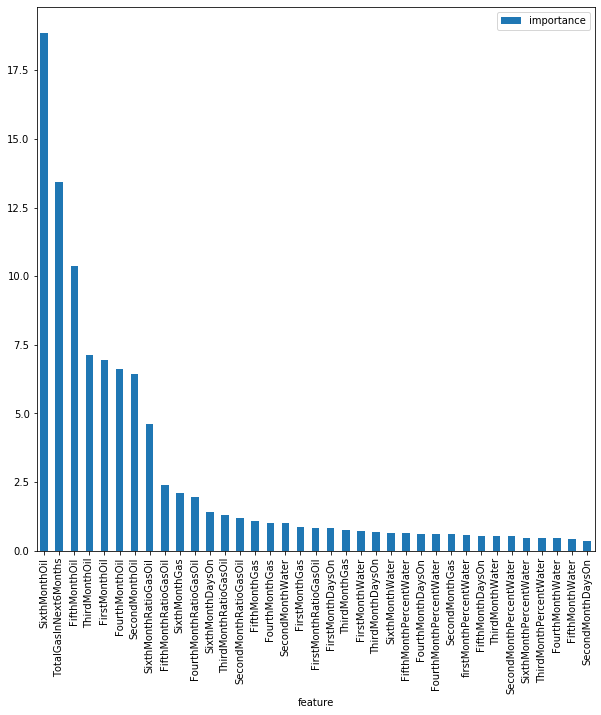

In [0]:
def Sort_Tuple(tup):      
    lst = len(tup)  
    for i in range(0, lst):  
          
        for j in range(0, lst-i-1):  
            if (tup[j][1] < tup[j + 1][1]):  
                temp = tup[j]  
                tup[j]= tup[j + 1]  
                tup[j + 1]= temp  
    return tup 
    
feature_importances =cat.get_feature_importance()
feature_importances = [(xt.columns[i],feature_importances[i])  for  i in range(len(feature_importances)) ]
# importances = cat.get_feature_importance()
 
feature_importances = Sort_Tuple(feature_importances)
df = pd.DataFrame(feature_importances, columns=['feature', 'importance'])
df.plot(kind='bar', x='feature',figsize=(10,10))
targetted= []
for i in range(25):
    targetted.append(feature_importances[i][0])
    
feature_importances

In [0]:
valscat = cat.predict(xp)
print (mean_absolute_error(yp,valscat))
valsnn = nn.predict(xpscaled)
valsavg = []
for i in range(len(valscat)):
  valsavg.append((valscat[i]+valsnn[i])/2)
print (mean_absolute_error(yp,valsavg))

2637.92343713223
2649.1698006082124


In [0]:
cat4 =  CatBoostRegressor(random_state=60,learning_rate=0.04078496171814678,subsample = 0.5966067900567058,iterations=2500,max_depth=int(round(5.941162788606626)),l2_leaf_reg =0.3240391456470025,colsample_bylevel=0.53514233486307,eval_metric="MAE",early_stopping_rounds=500)
# cat.fit(xt,yt,eval_set=Pool(xp,yp),verbose=500)

In [0]:
traindata.shape

(9324, 38)

In [0]:
traindata.eq(0).sum()

FirstMonthOil                31
FirstMonthGas               339
FirstMonthRatioGasOil       369
FirstMonthWater            3168
firstMonthPercentWater     3175
FirstMonthDaysOn           2825
SecondMonthOil              284
SecondMonthGas              338
SecondMonthRatioGasOil      538
SecondMonthWater           3121
SecondMonthPercentWater    3137
SecondMonthDaysOn          2882
ThirdMonthOil               282
ThirdMonthGas               304
ThirdMonthRatioGasOil       507
ThirdMonthWater            3035
ThirdMonthPercentWater     3047
ThirdMonthDaysOn           2881
FourthMonthOil              328
FourthMonthGas              312
FourthMonthRatioGasOil      533
FourthMonthWater           2995
FourthMonthPercentWater    3014
FourthMonthDaysOn          2907
FifthMonthOil               344
FifthMonthGas               322
FifthMonthRatioGasOil       555
FifthMonthWater            3001
FifthMonthPercentWater     3021
FifthMonthDaysOn           2905
SixthMonthOil               341
SixthMon

In [0]:
xlstm = traindata.drop(["TotalOilInNext6Months","TotalGasInNext6Months"],axis=1)

In [0]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVR  

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
# parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
# svr = SVR()
# clf = GridSearchCV(svr, parameters)
# # mean_absolute_error(yp,valssvr)
# clf.fit(xtscaled,yt)
# clf.best_params_

{'C': 10, 'epsilon': 0.5, 'gamma': 1e-07, 'kernel': 'linear'}

In [0]:
cat1 =  CatBoostRegressor(random_state=38,learning_rate=0.04078496171814678,subsample = 0.56067900567058,iterations=3000,max_depth=int(round(5.941162788606626)),l2_leaf_reg =0.39240391456470025,colsample_bylevel=0.63514233486307,eval_metric="MAE",early_stopping_rounds=500)
# cat1.fit(xt,yt,eval_set=Pool(xp,yp),verbose=500)

In [0]:
cat.fit(X,y,verbose=1000)
cat4.fit(X,y,verbose=1000)
cat1.fit(X,y,verbose=1000)
catress.fit(X,y,verbose=1000)

preds1= cat.predict(test)
preds2= catress.predict(test)
preds3= cat1.predict(test)
preds4= cat4.predict(test)



0:	learn: 11582.4974182	total: 9.13ms	remaining: 22.8s
1000:	learn: 1967.0212598	total: 8.38s	remaining: 12.5s
2000:	learn: 1467.0249803	total: 16.7s	remaining: 4.16s
2499:	learn: 1300.5814785	total: 20.8s	remaining: 0us
0:	learn: 11582.9538990	total: 7.35ms	remaining: 18.4s
1000:	learn: 2016.6844850	total: 6.39s	remaining: 9.56s
2000:	learn: 1543.7206012	total: 12.8s	remaining: 3.2s
2499:	learn: 1385.7706197	total: 16s	remaining: 0us
0:	learn: 11497.5964586	total: 8.27ms	remaining: 24.8s
1000:	learn: 1816.1138462	total: 7.48s	remaining: 14.9s
2000:	learn: 1333.3677364	total: 15.1s	remaining: 7.54s
2999:	learn: 1040.9435746	total: 22.7s	remaining: 0us
0:	learn: 11578.3911620	total: 9.55ms	remaining: 29.7s
1000:	learn: 1974.3500881	total: 8.37s	remaining: 17.7s
2000:	learn: 1476.6311359	total: 16.7s	remaining: 9.31s
3000:	learn: 1174.5301340	total: 25.2s	remaining: 939ms
3112:	learn: 1146.5125472	total: 26.1s	remaining: 0us


In [0]:
for i in range(len(preds1)):
  preds1[i]= preds1[i]*2/10+preds2[i]*2/10+preds3[i]*2/10+preds4[i]*4/10

In [0]:
# NUM_FEATURES = 6
# nn = Sequential()
# nn.add(keras.layers.LSTM(NUM_FEATURES,return_sequences=True,input_shape=(6,6),dropout=.20))
# # nn.add(BatchNormalization())
# nn.add(keras.layers.LSTM(NUM_FEATURES+1,dropout=.20))
# # nn.add(BatchNormalization())
# nn.add(Dense(NUM_FEATURES//2,activation="linear"))
# nn.add(Dropout(0.2))
# nn.add(Dense(NUM_FEATURES//3,activation="linear"))
# nn.add(Dropout(0.2))
# nn.add(Dense(1,activation="linear"))
# opt =keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
# nn.compile(loss="mse",optimizer='adam',metrics=['mse','mae'])

In [0]:
# nn.fit(xtscaled1,ytshaped,validation_data=(xpscaled1,ypshaped),epochs=100)